# Housing Affordability in Canada: 2019 - 2023

Housing affordability has been a hot topic globally, particularly during and following the pandemic. This project will examine how affordability has changed over the past 5 years in Canada's provinces.

To examine this, we will use:
* The median after-tax income in Canada 2019-2023 from Statistics Canada (https://www150.statcan.gc.ca/n1/daily-quotidien/250501/t002b-eng.htm)
* Monthly housing price statistics from the Canadian Real Estate Association from January 2019 to December 2023, grouped by year (https://www.crea.ca/housing-market-stats/canadian-housing-market-stats/)

The data is examined at a provincial level to match income data and create consistent affordability metrics. Territories were excluded due to a lack of available data.

Objective: Determine which provinces are the least/most affordable. 
Key finding: Overall affordability declined during the period. In 2023, British Columbia was the least affordable province, and Newfoundland and Labrador was the most affordable.

# Table of Contents

## A - Income Data

**Part 1 A: Data Preparation - Income Data**

&nbsp;&nbsp;&nbsp;&nbsp;1.1 Common imports

&nbsp;&nbsp;&nbsp;&nbsp;1.2 Load and name datasets

&nbsp;&nbsp;&nbsp;&nbsp;1.3 Drop unnecessary rows/columns

&nbsp;&nbsp;&nbsp;&nbsp;1.4 Rename columns

&nbsp;&nbsp;&nbsp;&nbsp;1.5 Convert data types

&nbsp;&nbsp;&nbsp;&nbsp;1.6 Add mean row


**Part 2 A: Feature Engineering - Income Data**

&nbsp;&nbsp;&nbsp;&nbsp;2.1 Create % change columns

**Part 3 A: Exploratory Data Analysis (EDA) - Income Data**

&nbsp;&nbsp;&nbsp;&nbsp;3.1 Identify max/min % change per year

&nbsp;&nbsp;&nbsp;&nbsp;3.2 Commentary on observed trends

**Part 4 A: Data Visualization - Income Data**

&nbsp;&nbsp;&nbsp;&nbsp;4.1 Line plot of median income by year/province

## B - Real Estate Data

**Part 1 B: Data Preparation - Real Estate Data**

&nbsp;&nbsp;&nbsp;&nbsp;1.2 Load and name datasets

&nbsp;&nbsp;&nbsp;&nbsp;1.3 Drop unnecessary rows/columns

&nbsp;&nbsp;&nbsp;&nbsp;1.4 Rename columns

&nbsp;&nbsp;&nbsp;&nbsp;1.5 Convert data types

&nbsp;&nbsp;&nbsp;&nbsp;1.6 Add mean row

&nbsp;&nbsp;&nbsp;&nbsp;1.7 Merge data

**Part 2 B: Feature Engineering - Real Estate Data**

&nbsp;&nbsp;&nbsp;&nbsp;2.1 Create % change columns

**Part 3 B: Exploratory Data Analysis (EDA) - Real Estate Data**

&nbsp;&nbsp;&nbsp;&nbsp;3.1 Identify max/min % change per year

&nbsp;&nbsp;&nbsp;&nbsp;3.2 Commentary on observed trends

**Part 4 B: Data Visualization - Real Estate Data**

&nbsp;&nbsp;&nbsp;&nbsp;4.2 Line plot of mean real estate prices by year/province

## C - Merged Data

**Part 2 C: Feature Engineering - Merged Data**

&nbsp;&nbsp;&nbsp;&nbsp;2.2 Affordability ratio feature

**Part 3 C: Exploratory Data Analysis (EDA) - Merged Data**

&nbsp;&nbsp;&nbsp;&nbsp;3.1 Identify max/min % change per year

&nbsp;&nbsp;&nbsp;&nbsp;3.2 Commentary on observed trends

&nbsp;&nbsp;&nbsp;&nbsp;3.3 Comparison function
  
**Part 4 C: Data Visualization**

&nbsp;&nbsp;&nbsp;&nbsp;4.3 Line plot of housing affordability ratio by year/province

&nbsp;&nbsp;&nbsp;&nbsp;4.4 Heat map of housing affordability ratio by year/province

**Part 5: Clustering Analysis (K-Means)**

&nbsp;&nbsp;&nbsp;&nbsp;5.1 Prepare data and select features

&nbsp;&nbsp;&nbsp;&nbsp;5.2 Standardize features (if applicable)

&nbsp;&nbsp;&nbsp;&nbsp;5.3 Apply K-Means clustering

&nbsp;&nbsp;&nbsp;&nbsp;5.4 Visualize clusters

&nbsp;&nbsp;&nbsp;&nbsp;5.5 Interpret cluster patterns


**Part 6: Conclusions**

&nbsp;&nbsp;&nbsp;&nbsp;6.1 Summary of findings

# Part 1 A: Data Preparation - Income Data

1.1 Common imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

1.2 Load and name dataset 

In [2]:
# file from Statistics Canada https://www150.statcan.gc.ca/n1/daily-quotidien/250501/t002b-eng.htm
median_income_df = pd.read_csv('t002b-eng.csv',skiprows=2) 

# drop last 4 rows as we do not need them
median_income_df = median_income_df.iloc[:-4] 

1.3 Clean: drop territories and rename first column

In [3]:
# Rename first column to 'Province'
median_income_df.columns.values[0] = 'Province' 

# Drop the 3 territory rows and the Canada row
territories = ['Yukon', 'Northwest Territories', 'Nunavut', 'Canada{1}']
median_income_df = median_income_df[~median_income_df['Province'].isin(territories)].reset_index(drop=True)

1.4 Rename columns

In [4]:
median_income_df.rename(columns={
    '2023 constant dollars': '2019',
    '2023 constant dollars.1': '2020',
    '2023 constant dollars.2': '2021',
    '2023 constant dollars.3': '2022',
    '2023 constant dollars.4': '2023'
}, inplace=True)

median_income_df

,Province,2019,2020,2021,2022,2023
0,Newfoundland and Labrador,64100.0,68000.0,68900.0,65600.0,65700.0
1,Prince Edward Island,65600.0,68200.0,69300.0,65700.0,64500.0
2,Nova Scotia,61100.0,65900.0,66800.0,60800.0,62900.0
3,New Brunswick,62900.0,65200.0,66600.0,62000.0,62700.0
4,Quebec,63500.0,68500.0,68100.0,67100.0,66800.0
5,Ontario,74600.0,80400.0,81000.0,77500.0,78600.0
6,Manitoba,69500.0,72300.0,71800.0,69600.0,70100.0
7,Saskatchewan,73900.0,77600.0,75600.0,74900.0,72800.0
8,Alberta,85400.0,89100.0,85500.0,86000.0,88500.0
9,British Columbia,72300.0,77300.0,76000.0,73300.0,73900.0


1.5 Convert data types

In [5]:
# Convert year columns to numeric:
for col in median_income_df.columns[1:]:
    median_income_df[col] = pd.to_numeric(median_income_df[col], errors='coerce')

1.6 Add a mean row

In [6]:
mean_values = median_income_df.mean(numeric_only=True)
median_income_df.loc['Mean'] = ['Mean'] + mean_values.tolist()
median_income_df

,Province,2019,2020,2021,2022,2023
0,Newfoundland and Labrador,64100.0,68000.0,68900.0,65600.0,65700.0
1,Prince Edward Island,65600.0,68200.0,69300.0,65700.0,64500.0
2,Nova Scotia,61100.0,65900.0,66800.0,60800.0,62900.0
3,New Brunswick,62900.0,65200.0,66600.0,62000.0,62700.0
4,Quebec,63500.0,68500.0,68100.0,67100.0,66800.0
5,Ontario,74600.0,80400.0,81000.0,77500.0,78600.0
6,Manitoba,69500.0,72300.0,71800.0,69600.0,70100.0
7,Saskatchewan,73900.0,77600.0,75600.0,74900.0,72800.0
8,Alberta,85400.0,89100.0,85500.0,86000.0,88500.0
9,British Columbia,72300.0,77300.0,76000.0,73300.0,73900.0


# Part 2 A: Feature Engingeering - Income Data

In [7]:
from decimal import Decimal

2.1 Create % change column

In [8]:
# Create a column for each year-over-year % change 
for year in range(2019, 2023):
    col_name = f'{year}-{year+1} % change'
    # Perform percentage change calculation with high precision
    median_income_df[col_name] = ((median_income_df[str(year + 1)] - median_income_df[str(year)]) / median_income_df[str(year)] * 100)
    # Convert percentage change results to Decimal for high precision and round to 2 decimal places
    median_income_df[col_name] = median_income_df[col_name].apply(lambda x: round(Decimal(x), 2))

# Check the result
median_income_df

,Province,2019,2020,2021,2022,2023,2019-2020 % change,2020-2021 % change,2021-2022 % change,2022-2023 % change
0,Newfoundland and Labrador,64100.0,68000.0,68900.0,65600.0,65700.0,6.08,1.32,-4.79,0.15
1,Prince Edward Island,65600.0,68200.0,69300.0,65700.0,64500.0,3.96,1.61,-5.19,-1.83
2,Nova Scotia,61100.0,65900.0,66800.0,60800.0,62900.0,7.86,1.37,-8.98,3.45
3,New Brunswick,62900.0,65200.0,66600.0,62000.0,62700.0,3.66,2.15,-6.91,1.13
4,Quebec,63500.0,68500.0,68100.0,67100.0,66800.0,7.87,-0.58,-1.47,-0.45
5,Ontario,74600.0,80400.0,81000.0,77500.0,78600.0,7.77,0.75,-4.32,1.42
6,Manitoba,69500.0,72300.0,71800.0,69600.0,70100.0,4.03,-0.69,-3.06,0.72
7,Saskatchewan,73900.0,77600.0,75600.0,74900.0,72800.0,5.01,-2.58,-0.93,-2.80
8,Alberta,85400.0,89100.0,85500.0,86000.0,88500.0,4.33,-4.04,0.58,2.91
9,British Columbia,72300.0,77300.0,76000.0,73300.0,73900.0,6.92,-1.68,-3.55,0.82


# Part 3 A: Exploratory Data Analysis (EDA) - Income Data

3.1 Identify provinces with max/min % change per year

In [41]:
max_row_1 = median_income_df.loc[median_income_df['2019-2020 % change'].idxmax()]
min_row_1 = median_income_df.loc[median_income_df['2019-2020 % change'].idxmin()]

max_row_2 = median_income_df.loc[median_income_df['2020-2021 % change'].idxmax()]
min_row_2 = median_income_df.loc[median_income_df['2020-2021 % change'].idxmin()]

max_row_3 = median_income_df.loc[median_income_df['2021-2022 % change'].idxmax()]
min_row_3 = median_income_df.loc[median_income_df['2021-2022 % change'].idxmin()]

max_row_4 = median_income_df.loc[median_income_df['2022-2023 % change'].idxmax()]
min_row_4 = median_income_df.loc[median_income_df['2022-2023 % change'].idxmin()]

# Print the province and the min/max value
# 2019 - 2020 
print(f"Province with highest % change (2019-2020): {max_row_1['Province']}")
print(f"Max % change: {max_row_1['2019-2020 % change']}%")
print(f"Province with lowest % change (2019-2020): {min_row_1['Province']}")
print(f"Max % change: {min_row_1['2019-2020 % change']}%")
# 2020 - 2021
print(f"Province with highest % change (2020-2021): {max_row_2['Province']}")
print(f"Max % change: {max_row_2['2020-2021 % change']}%")
print(f"Province with lowest % change (2020-2021): {min_row_2['Province']}")
print(f"Max % change: {min_row_2['2020-2021 % change']}%")
# 2021 - 2022
print(f"Province with highest % change (2021-2022): {max_row_3['Province']}")
print(f"Max % change: {max_row_3['2021-2022 % change']}%")
print(f"Province with lowest % change (2021-2022): {min_row_3['Province']}")
print(f"Max % change: {min_row_3['2021-2022 % change']}%")
# 2022 - 2023 
print(f"Province with highest % change (2022-2023): {max_row_4['Province']}")
print(f"Max % change: {max_row_4['2022-2023 % change']}%")
print(f"Province with lowest % change (2022-2023): {min_row_4['Province']}")
print(f"Max % change: {min_row_4['2022-2023 % change']}%")

Province with highest % change (2019-2020): Quebec
Max % change: 7.87%
Province with lowest % change (2019-2020): New Brunswick
Max % change: 3.66%
Province with highest % change (2020-2021): New Brunswick
Max % change: 2.15%
Province with lowest % change (2020-2021): Alberta
Max % change: -4.04%
Province with highest % change (2021-2022): Alberta
Max % change: 0.58%
Province with lowest % change (2021-2022): Nova Scotia
Max % change: -8.98%
Province with highest % change (2022-2023): Nova Scotia
Max % change: 3.45%
Province with lowest % change (2022-2023): Saskatchewan
Max % change: -2.80%


3.2 Commentary on observed trends 
### Summary: Median Income Change 2019 - 2023
From this summary, we can see that the highest median income changes came from 2019 to 2020 in Quebec, with a growth of 7.87%. 

From 2019-2020, all provinces saw a positive median income increase. This dropped off the next year, in 2020-2021, half of the provinces (Quebec, Manitoba, Saskatchewan, Alberta and British Columbia) had a negative, or decreasing median income change. This could likely be explained by the COVID-19 pandemic. From 2020-2021, Alberta saw the biggest downturn in median incomes, dropping off 4.04%. This could be related to the struggling oil sector during the pandemic (reference: https://lmic-cimt.ca/publications-all/lmi-insight-report-no-33-sectors-at-risk-the-impact-of-covid-19-on-the-canadian-oil-and-gas-sector/) 

2021-2022 was an even tougher year, with all provinces but Alberta having a negative median salary change. The hardest hit that year was Nova Scotia, with a -8.98% change. 

Nova Scotia saw the highest positive change the following year, in 2022-2023, Nova Scotia had a positive 3.45% median salary change. In 2022-2023, only 3 provinces had a negative median salary change, being PEI, Saskatchewan and Quebec. 

Looking at the Mean row at the bottom of the median_income_df table highlights these trends clearly:
* A pre-pandemic mean increase of +5.72% in 2019–2020
* Followed by two years of decline, with -0.40% in 2020–2021 and -3.71% in 2021–2022
* Then a slight recovery in 2022–2023, with a +0.57% mean increase

There's a clear regional variability in the median salary impact of the COVID-19 pandemic. 

# Part 4 A: Data Visualization - Income Data

4.1 Line plot of median income by year/province

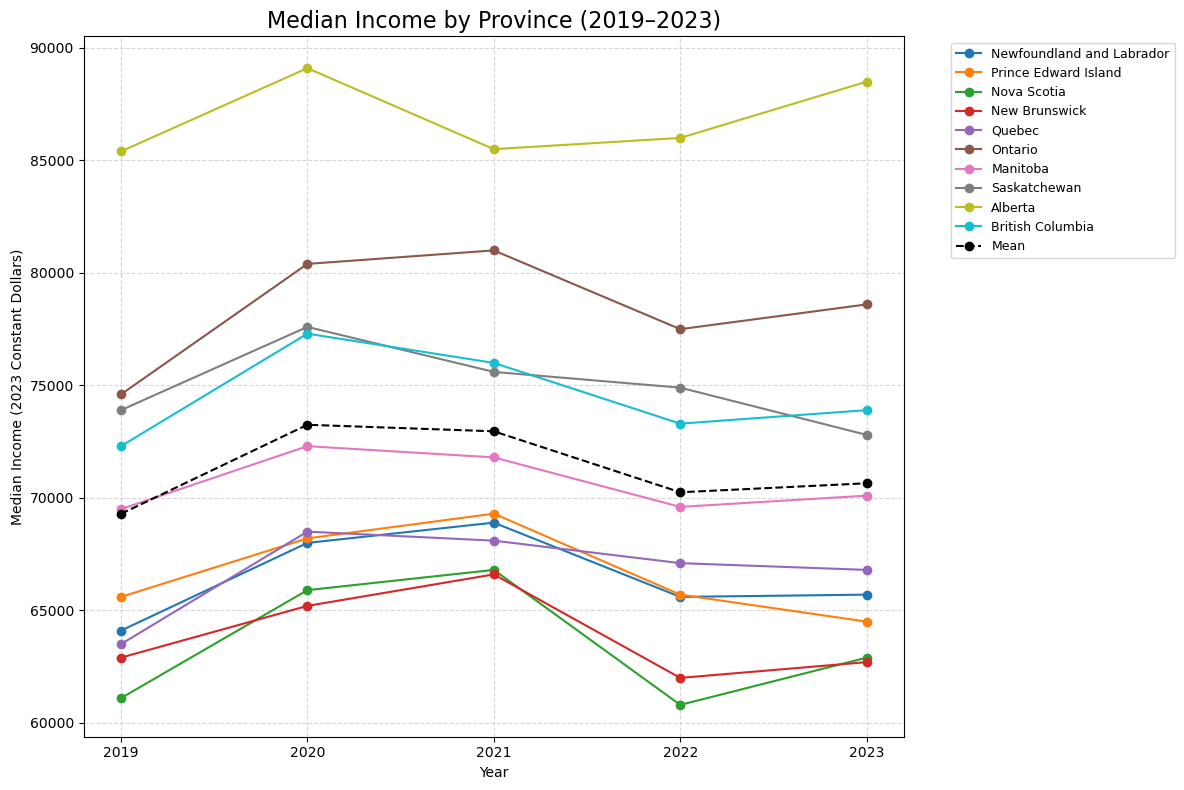

In [10]:
# Define color map for provinces for consistency
# Get a list of provinces (excluding 'Mean') to assign colors
provinces = [prov for prov in median_income_df['Province'].unique() if prov != 'Mean']

# Use seaborn's color palette for consistent and visually distinct colors
palette = sns.color_palette("tab10", n_colors=len(provinces)) 

# Create a color dictionary
color_map = dict(zip(provinces, palette))

# Manually assign black for 'Mean'
color_map['Mean'] = 'black'

# Set the figure size
plt.figure(figsize=(12, 8))

years = ['2019', '2020', '2021', '2022', '2023']

# Plot each province except Mean
for i, row in median_income_df.iterrows():
    province = row['Province']
    plt.plot(years,
             row[years],
             marker='o',
             label = province,
             color = color_map[province],
             linestyle='--' if province == 'Mean' else '-')

# Title and labels
plt.title('Median Income by Province (2019–2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Median Income (2023 Constant Dollars)')
plt.xticks(['2019', '2020', '2021', '2022', '2023'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

Now we will examine the housing prices in each of the provinces in order to compare the changes to the salary changes.

In [11]:
pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Part 1: Data Preparation - Real Estate Data

In [12]:
# The housing data is from the Canadian Real Estate Association (CREA). We will save a DF for each province to later combine.
# Turning off scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

In [13]:
# 1.2 Load and name datasets - Alberta

# Load the 'ALBERTA' sheet into a DataFrame
AB_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='ALBERTA')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
AB_housing = AB_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
AB_housing = AB_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
AB_housing.iloc[:, 0] = pd.to_datetime(AB_housing.iloc[:, 0])

# Extract the year into a new column
AB_housing['Year'] = AB_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
AB_housing_yearly = AB_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
AB_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,382783
1,2020,381775
2,2021,414108
3,2022,457967
4,2023,470575


In [14]:
# 1.2 Load and name datasets - BC 

# Load the 'BRITISH_COLUMBIA' sheet into a DataFrame
BC_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='BRITISH_COLUMBIA')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
BC_housing = BC_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
BC_housing = BC_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
BC_housing.iloc[:, 0] = pd.to_datetime(BC_housing.iloc[:, 0])

# Extract the year into a new column
BC_housing['Year'] = BC_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
BC_housing_yearly = BC_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
BC_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,684800
1,2020,720725
2,2021,881158
3,2022,1002258
4,2023,964025


In [15]:
# 1.2 Load and name datasets - Manitoba
# 1.6 - Manitoba is not explicitly mentioned in the file, so Winnipeg will represent the MB data
# Load the 'WINNIPEG' sheet into a DataFrame
MB_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='WINNIPEG')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
MB_housing = MB_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
MB_housing = MB_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
MB_housing.iloc[:, 0] = pd.to_datetime(MB_housing.iloc[:, 0])

# Extract the year into a new column
MB_housing['Year'] = MB_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
MB_housing_yearly = MB_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
MB_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,277883
1,2020,290467
2,2021,326958
3,2022,349450
4,2023,338800


In [16]:
# 1.2 Load and name datasets - New Brunswick

# Load the 'NEW_BRUNSWICK' sheet into a DataFrame
NB_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='NEW_BRUNSWICK')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
NB_housing = NB_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
NB_housing = NB_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
NB_housing.iloc[:, 0] = pd.to_datetime(NB_housing.iloc[:, 0])

# Extract the year into a new column
NB_housing['Year'] = NB_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
NB_housing_yearly = NB_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
NB_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,167225
1,2020,181725
2,2021,227125
3,2022,277150
4,2023,280442


In [17]:
# 1.2 Load and name datasets - Newfoundland and Labrador

# Load the 'NEWFOUNDLAND_AND_LABRADOR' sheet into a DataFrame
NL_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='NEWFOUNDLAND_AND_LABRADOR')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
NL_housing = NL_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
NL_housing = NL_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
NL_housing.iloc[:, 0] = pd.to_datetime(NL_housing.iloc[:, 0])

# Extract the year into a new column
NL_housing['Year'] = NL_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
NL_housing_yearly = NL_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
NL_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,230350
1,2020,231908
2,2021,249992
3,2022,271633
4,2023,280100


In [18]:
# 1.2 Load and name datasets - Nova Scotia

# Load the 'NOVA_SCOTIA' sheet into a DataFrame
NS_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='NOVA_SCOTIA')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
NS_housing = NS_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
NS_housing = NS_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
NS_housing.iloc[:, 0] = pd.to_datetime(NB_housing.iloc[:, 0])

# Extract the year into a new column
NS_housing['Year'] = NS_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
NS_housing_yearly = NS_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
NS_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,229792
1,2020,259942
2,2021,336900
3,2022,391383
4,2023,393483


In [19]:
# 1.2 Load and name datasets - Ontario

# Load the 'ONTARIO' sheet into a DataFrame
ON_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='ONTARIO')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
ON_housing = ON_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
ON_housing = ON_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
ON_housing.iloc[:, 0] = pd.to_datetime(ON_housing.iloc[:, 0])

# Extract the year into a new column
ON_housing['Year'] = ON_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
ON_housing_yearly = ON_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
ON_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,603908
1,2020,667200
2,2021,845400
3,2022,953375
4,2023,887167


In [20]:
# 1.2 Load and name datasets - Prince Edward Island

# Load the 'PRINCE_EDWARD_ISLAND' sheet into a DataFrame
PEI_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='PRINCE_EDWARD_ISLAND')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
PEI_housing = PEI_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
PEI_housing = PEI_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
PEI_housing.iloc[:, 0] = pd.to_datetime(PEI_housing.iloc[:, 0])

# Extract the year into a new column
PEI_housing['Year'] = PEI_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
PEI_housing_yearly = PEI_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
PEI_housing_yearly

,Year,One_Storey_Benchmark_SA
0,2019,218783
1,2020,242558
2,2021,301200
3,2022,349158
4,2023,357458


In [21]:
# 1.2 Load and name datasets - Quebec

# Load the 'QUEBEC' sheet into a DataFrame
QC_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='QUEBEC')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
QC_housing = QC_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
QC_housing = QC_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
QC_housing.iloc[:, 0] = pd.to_datetime(QC_housing.iloc[:, 0])

# Extract the year into a new column
QC_housing['Year'] = QC_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
QC_housing_yearly = QC_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
QC_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,316708
1,2020,351258
2,2021,420258
3,2022,466700
4,2023,461067


In [22]:
# 1.2 Load and name datasets - Saskatchewan

# Load the 'SASKATCHEWAN' sheet into a DataFrame
SK_housing = pd.read_excel('Seasonally Adjusted (M).xlsx', sheet_name='SASKATCHEWAN')

# Drop all columns but 1 (year) and 8 (Composite_Benchmark_SA)
SK_housing = SK_housing.iloc[:, [0, 7]]

# Keep rows 168 to 227 inclusive (iloc upper bound is exclusive, so use 228)
SK_housing = SK_housing.iloc[168:228].reset_index(drop=True)

# Now we will merge monthly rows into a single row by year, averaging the values in the columns 2-6

# Ensure the first column is datetime
SK_housing.iloc[:, 0] = pd.to_datetime(SK_housing.iloc[:, 0])

# Extract the year into a new column
SK_housing['Year'] = SK_housing.iloc[:, 0].dt.year

# Group by year and average all numeric columns
SK_housing_yearly = SK_housing.groupby('Year').mean(numeric_only=True).reset_index()

# Preview the data
SK_housing_yearly

,Year,Composite_Benchmark_SA
0,2019,274908
1,2020,284150
2,2021,308433
3,2022,321942
4,2023,322067


In [23]:
# 1.7 - Merge data: Combine all the provincial yearly housing data into a single table with year as column titles, and provinces as rows 

# Dictionary of provincial data 
provincial_df = { 
    'British Columbia':BC_housing_yearly,
    'Alberta': AB_housing_yearly,
    'Saskatchewan': SK_housing_yearly,
    'Manitoba': MB_housing_yearly,
    'Ontario': ON_housing_yearly,
    'Quebec': QC_housing_yearly,
    'New Brunswick': NB_housing_yearly,
    'Nova Scotia': NS_housing_yearly,
    'Prince Edward Island': PEI_housing_yearly,
    'Newfoundland and Labrador': NL_housing_yearly
}

# Creating an empty list to store rows 
rows = []

# Processing each provinces df 
for province, df in provincial_df.items():
    df = df.set_index('Year')
    df = df.transpose()
    df['Province'] = province 
    rows.append(df)

# Combining into a single df 
provincial_housing = pd.concat(rows)
provincial_housing.set_index('Province', inplace=True)

provincial_housing

Year,2019,2020,2021,2022,2023
Province,,,,,
British Columbia,684800,720725,881158,1002258,964025
Alberta,382783,381775,414108,457967,470575
Saskatchewan,274908,284150,308433,321942,322067
Manitoba,277883,290467,326958,349450,338800
Ontario,603908,667200,845400,953375,887167
Quebec,316708,351258,420258,466700,461067
New Brunswick,167225,181725,227125,277150,280442
Nova Scotia,229792,259942,336900,391383,393483
Prince Edward Island,218783,242558,301200,349158,357458


# Part 2: Feature Engineering - Real Estate Data

2.1 Create % change columns

In [24]:
# Drop year as column name
provincial_housing.columns.name = None

# Ensure index is named and reset
if provincial_housing.index.name is None:
    provincial_housing.index.name = 'Province'
provincial_housing = provincial_housing.reset_index()

# Remove any existing mean row
provincial_housing = provincial_housing[provincial_housing['Province'] != 'Mean']

# Format floats
pd.options.display.float_format = '{:.2f}'.format

# Ensure column names are string
provincial_housing.columns = provincial_housing.columns.astype(str)

# Calculate % change columns
for year in range(2019, 2023):
    col_name = f'{year}-{year+1} % change'
    provincial_housing[col_name] = ((provincial_housing[str(year + 1)] - provincial_housing[str(year)]) / provincial_housing[str(year)] * 100)
    provincial_housing[col_name] = provincial_housing[col_name].apply(lambda x: round(Decimal(x), 2))

# Convert % change columns to float
for col in provincial_housing.columns:
    if '% change' in col:
        provincial_housing[col] = provincial_housing[col].astype(float)

# Add final clean Mean row
mean_values_housing = provincial_housing.mean(numeric_only=True)
mean_row = pd.DataFrame([['Mean'] + mean_values_housing.tolist()], columns=provincial_housing.columns)
provincial_housing = pd.concat([provincial_housing, mean_row], ignore_index=True)

provincial_housing

,Province,2019,2020,2021,2022,2023,2019-2020 % change,2020-2021 % change,2021-2022 % change,2022-2023 % change
0,British Columbia,684800.00,720725.00,881158.33,1002258.33,964025.00,5.25,22.26,13.74,-3.81
1,Alberta,382783.33,381775.00,414108.33,457966.67,470575.00,-0.26,8.47,10.59,2.75
2,Saskatchewan,274908.33,284150.00,308433.33,321941.67,322066.67,3.36,8.55,4.38,0.04
3,Manitoba,277883.33,290466.67,326958.33,349450.00,338800.00,4.53,12.56,6.88,-3.05
4,Ontario,603908.33,667200.00,845400.00,953375.00,887166.67,10.48,26.71,12.77,-6.94
5,Quebec,316708.33,351258.33,420258.33,466700.00,461066.67,10.91,19.64,11.05,-1.21
6,New Brunswick,167225.00,181725.00,227125.00,277150.00,280441.67,8.67,24.98,22.03,1.19
7,Nova Scotia,229791.67,259941.67,336900.00,391383.33,393483.33,13.12,29.61,16.17,0.54
8,Prince Edward Island,218783.33,242558.33,301200.00,349158.33,357458.33,10.87,24.18,15.92,2.38
9,Newfoundland and Labrador,230350.00,231908.33,249991.67,271633.33,280100.00,0.68,7.80,8.66,3.12


# Part 3 B: Exploratory Data Analysis (EDA) - Real Estate Data

3.1 Identify max/min % change per year

In [42]:
max_row_1 = provincial_housing.loc[provincial_housing['2019-2020 % change'].idxmax()]
min_row_1 = provincial_housing.loc[provincial_housing['2019-2020 % change'].idxmin()]

max_row_2 = provincial_housing.loc[provincial_housing['2020-2021 % change'].idxmax()]
min_row_2 = provincial_housing.loc[provincial_housing['2020-2021 % change'].idxmin()]

max_row_3 = provincial_housing.loc[provincial_housing['2021-2022 % change'].idxmax()]
min_row_3 = provincial_housing.loc[provincial_housing['2021-2022 % change'].idxmin()]

max_row_4 = provincial_housing.loc[provincial_housing['2022-2023 % change'].idxmax()]
min_row_4 = provincial_housing.loc[provincial_housing['2022-2023 % change'].idxmin()]

# Print the province and the min/max value
# 2019 - 2020 
print(f"Province with highest % change in real estate prices (2019-2020): {max_row_1['Province']}")
print(f"Max % change: {max_row_1['2019-2020 % change']}%")
print(f"Province with lowest % change in real estate prices (2019-2020): {min_row_1['Province']}")
print(f"Max % change: {min_row_1['2019-2020 % change']}%")
# 2020 - 2021
print(f"Province with highest % change in real estate prices (2020-2021): {max_row_2['Province']}")
print(f"Max % change: {max_row_2['2020-2021 % change']}%")
print(f"Province with lowest % change in real estate prices (2020-2021): {min_row_2['Province']}")
print(f"Max % change: {min_row_2['2020-2021 % change']}%")
# 2021 - 2022
print(f"Province with highest % change in real estate prices (2021-2022): {max_row_3['Province']}")
print(f"Max % change: {max_row_3['2021-2022 % change']}%")
print(f"Province with lowest % change in real estate prices (2021-2022): {min_row_3['Province']}")
print(f"Max % change: {min_row_3['2021-2022 % change']}%")
# 2022 - 2023 
print(f"Province with highest % change in real estate prices (2022-2023): {max_row_4['Province']}")
print(f"Max % change: {max_row_4['2022-2023 % change']}%")
print(f"Province with lowest % change (2022-2023): {min_row_4['Province']}")
print(f"Max % change: {min_row_4['2022-2023 % change']}%")

Province with highest % change in real estate prices (2019-2020): Nova Scotia
Max % change: 13.12%
Province with lowest % change in real estate prices (2019-2020): Alberta
Max % change: -0.26%
Province with highest % change in real estate prices (2020-2021): Nova Scotia
Max % change: 29.61%
Province with lowest % change in real estate prices (2020-2021): Newfoundland and Labrador
Max % change: 7.8%
Province with highest % change in real estate prices (2021-2022): New Brunswick
Max % change: 22.03%
Province with lowest % change in real estate prices (2021-2022): Saskatchewan
Max % change: 4.38%
Province with highest % change in real estate prices (2022-2023): Newfoundland and Labrador
Max % change: 3.12%
Province with lowest % change (2022-2023): Ontario
Max % change: -6.94%


3.2 Commentary on observed trends
# Mean Residential Real Estate Change 2019 - 2023: Summary
Between 2019 and 2023, residential real estate prices across Canadian provinces underwent notable fluctuations.

The most dramatic year-over-year increases occurred between 2020 and 2021, particularly in the Atlantic provinces: 
* Nova Scotia +29.61%
* New Brunswick +24.98%
* PEI +24.18%

This surge aligns with broader trends of increased interprovincial migration and remote work flexibility, which drove demand in more affordable regions. Nova Scotia, for example, saw significant in-migration from other provinces during this period  (https://www.zoocasa.com/blog/remote-work-and-real-estate/).
 
The period from 2019 to 2022 demonstrates a period of rapid growth, followed by a market cooldown in 2022-2023, when the national average price declined by 0.5%. 

Looking at the Mean row of the dataset highlights this pattern: 
* 2019-2020: Pre-pandemic growth of +6.76%
* 2020-2021: Surge of +18.48%
* 2021-2022: Continued strong growth of +12.22%
* 2022-2023: Modest correction with -0.50% decrease

With nearly all provinces seeing increases from 2019 to 2022, 2023 showed regional divergence and recovery from the significant market changes in the years before. Ontario (-6.94%), BC (-3.81%) and Manitoba (-3.05%) experienced price drops, while Newfoundland and Labrador (+3.12 %) and PEI (+2.38%) continued to see modest growth.

This suggests that the impact of the pandemic on real estate markets was not uniform, with the Atlantic provinces initially benefiting from migration-driven demand, but still showing resilience into 2023, unlike some higher-priced markets, like Ontario and BC, which corrected more sharply.

# Part 4 B: Data Visualization - Real Estate Data

4.2 Line plot of mean real estate prices by year/province

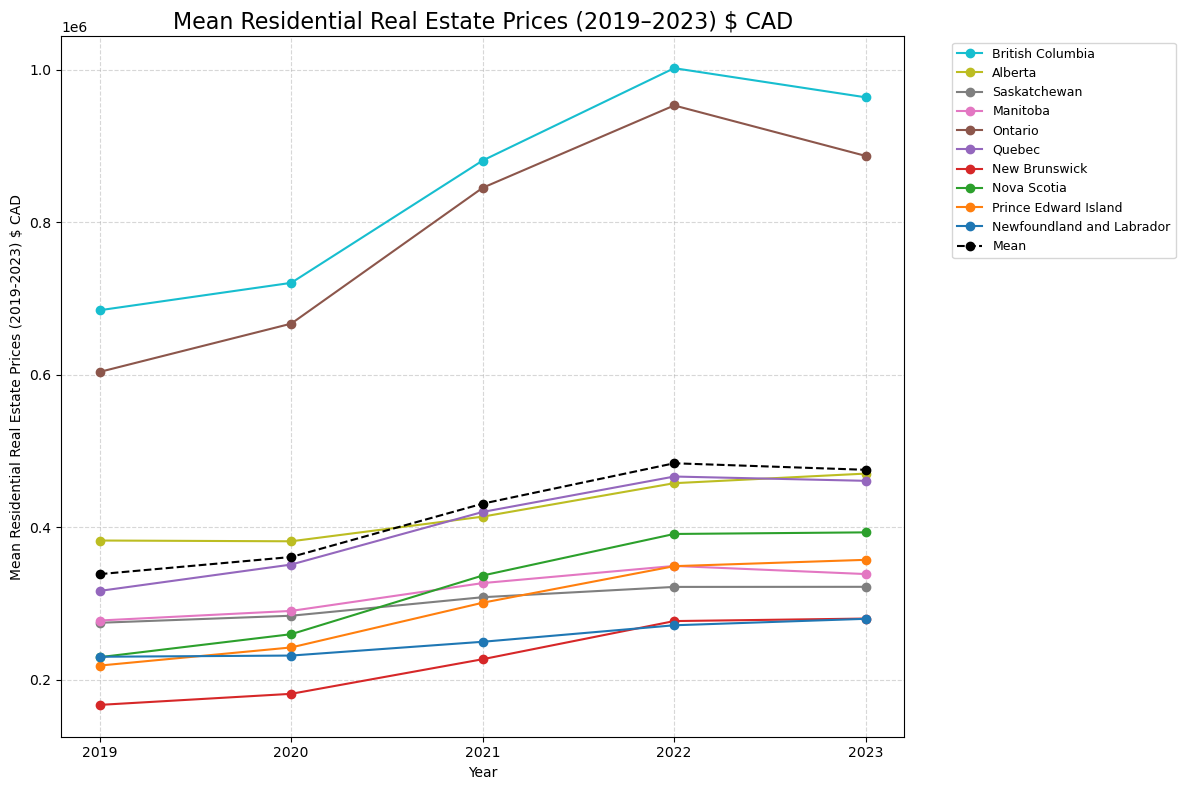

In [26]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define years
years = ['2019', '2020', '2021', '2022', '2023']

# Plot each province except Mean
for i, row in provincial_housing.iterrows():
    province = row['Province']
    plt.plot(years,
             row[years],
             marker='o',
             label = province,
             color = color_map[province],
             linestyle='--' if province == 'Mean' else '-')

# Title and labels
plt.title('Mean Residential Real Estate Prices (2019–2023) $ CAD', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Mean Residential Real Estate Prices (2019-2023) $ CAD')
plt.xticks(years)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

# Part 2 C: Feature Engineering - Merged Data

#### Merge the two dataframes into one to compare median income by year and province to the residential housing prices

In [43]:
# Ensure housing columns are in float format and round to 2 decimal places
housing_cols = [str(year) for year in range(2019, 2024)]

# Convert columns to float and round to 2 decimals
provincial_housing[housing_cols] = provincial_housing[housing_cols].apply(lambda col: col.astype(float).round(2))

In [28]:
# Merge
combined_df = pd.merge(
    median_income_df, 
    provincial_housing, 
    on='Province', 
    suffixes=('_income', '_housing')
)
combined_df

,Province,2019_income,2020_income,2021_income,2022_income,2023_income,2019-2020 % change_income,2020-2021 % change_income,2021-2022 % change_income,2022-2023 % change_income,2019_housing,2020_housing,2021_housing,2022_housing,2023_housing,2019-2020 % change_housing,2020-2021 % change_housing,2021-2022 % change_housing,2022-2023 % change_housing
0,Newfoundland and Labrador,64100.00,68000.00,68900.00,65600.00,65700.00,6.08,1.32,-4.79,0.15,230350.00,231908.33,249991.67,271633.33,280100.00,0.68,7.80,8.66,3.12
1,Prince Edward Island,65600.00,68200.00,69300.00,65700.00,64500.00,3.96,1.61,-5.19,-1.83,218783.33,242558.33,301200.00,349158.33,357458.33,10.87,24.18,15.92,2.38
2,Nova Scotia,61100.00,65900.00,66800.00,60800.00,62900.00,7.86,1.37,-8.98,3.45,229791.67,259941.67,336900.00,391383.33,393483.33,13.12,29.61,16.17,0.54
3,New Brunswick,62900.00,65200.00,66600.00,62000.00,62700.00,3.66,2.15,-6.91,1.13,167225.00,181725.00,227125.00,277150.00,280441.67,8.67,24.98,22.03,1.19
4,Quebec,63500.00,68500.00,68100.00,67100.00,66800.00,7.87,-0.58,-1.47,-0.45,316708.33,351258.33,420258.33,466700.00,461066.67,10.91,19.64,11.05,-1.21
5,Ontario,74600.00,80400.00,81000.00,77500.00,78600.00,7.77,0.75,-4.32,1.42,603908.33,667200.00,845400.00,953375.00,887166.67,10.48,26.71,12.77,-6.94
6,Manitoba,69500.00,72300.00,71800.00,69600.00,70100.00,4.03,-0.69,-3.06,0.72,277883.33,290466.67,326958.33,349450.00,338800.00,4.53,12.56,6.88,-3.05
7,Saskatchewan,73900.00,77600.00,75600.00,74900.00,72800.00,5.01,-2.58,-0.93,-2.80,274908.33,284150.00,308433.33,321941.67,322066.67,3.36,8.55,4.38,0.04
8,Alberta,85400.00,89100.00,85500.00,86000.00,88500.00,4.33,-4.04,0.58,2.91,382783.33,381775.00,414108.33,457966.67,470575.00,-0.26,8.47,10.59,2.75
9,British Columbia,72300.00,77300.00,76000.00,73300.00,73900.00,6.92,-1.68,-3.55,0.82,684800.00,720725.00,881158.33,1002258.33,964025.00,5.25,22.26,13.74,-3.81


2.2 Affordabiloty ratio feature

In [29]:
for year in ['2019', '2020', '2021', '2022', '2023']:
    income_col = f'{year}_income'
    housing_col = f'{year}_housing'
    ratio_col = f'{year}_affordability_ratio'
    
    combined_df[ratio_col] = combined_df[housing_col] / combined_df[income_col]

Context: The higher the ratio, the less affordable. 

In [30]:
ratio_df = combined_df[['Province', '2019_affordability_ratio','2020_affordability_ratio','2021_affordability_ratio','2022_affordability_ratio','2023_affordability_ratio']]
ratio_df

,Province,2019_affordability_ratio,2020_affordability_ratio,2021_affordability_ratio,2022_affordability_ratio,2023_affordability_ratio
0,Newfoundland and Labrador,3.59,3.41,3.63,4.14,4.26
1,Prince Edward Island,3.34,3.56,4.35,5.31,5.54
2,Nova Scotia,3.76,3.94,5.04,6.44,6.26
3,New Brunswick,2.66,2.79,3.41,4.47,4.47
4,Quebec,4.99,5.13,6.17,6.96,6.90
5,Ontario,8.10,8.30,10.44,12.30,11.29
6,Manitoba,4.00,4.02,4.55,5.02,4.83
7,Saskatchewan,3.72,3.66,4.08,4.30,4.42
8,Alberta,4.48,4.28,4.84,5.33,5.32
9,British Columbia,9.47,9.32,11.59,13.67,13.04


# Part 3 C: Exploratory Data Analysis (EDA) - Merged Data

3.1 Identify max/min % change per year

In [44]:
max_row_1 = ratio_df.loc[ratio_df['2019_affordability_ratio'].idxmax()]
min_row_1 = ratio_df.loc[ratio_df['2019_affordability_ratio'].idxmin()]

max_row_2 = ratio_df.loc[ratio_df['2020_affordability_ratio'].idxmax()]
min_row_2 = ratio_df.loc[ratio_df['2020_affordability_ratio'].idxmin()]

max_row_3 = ratio_df.loc[ratio_df['2021_affordability_ratio'].idxmax()]
min_row_3 = ratio_df.loc[ratio_df['2021_affordability_ratio'].idxmin()]

max_row_4 = ratio_df.loc[ratio_df['2022_affordability_ratio'].idxmax()]
min_row_4 = ratio_df.loc[ratio_df['2022_affordability_ratio'].idxmin()]

# Print the province and the min/max value
# 2019
print(f"Province with highest income to housing price ratio(2019): {max_row_1['Province']}")
print(f"Max income to housing ratio: {max_row_1['2019_affordability_ratio']}")
print(f"Province with lowest income to housing price ratio (2019): {min_row_1['Province']}")
print(f"Max income to housing ratio: {min_row_1['2019_affordability_ratio']}")
# 2020
print(f"Province with highest income to housing price ratio (2020): {max_row_2['Province']}")
print(f"Max income to housing ratio: {max_row_2['2020_affordability_ratio']}")
print(f"Province with lowest income to housing price ratio (2020): {min_row_2['Province']}")
print(f"Max income to housing ratio: {min_row_2['2020_affordability_ratio']}")
# 2021
print(f"Province with highest income to housing price ratio (2021): {max_row_3['Province']}")
print(f"Max income to housing ratio: {max_row_3['2021_affordability_ratio']}")
print(f"Province with lowest income to housing price ratio (2021): {min_row_3['Province']}")
print(f"Max income to housing ratio: {min_row_3['2021_affordability_ratio']}")
# 2022
print(f"Province with highest income to housing price ratio (2022): {max_row_4['Province']}")
print(f"Max income to housing ratio: {max_row_4['2022_affordability_ratio']}")
print(f"Province with lowest income to housing price ratio (2022): {min_row_4['Province']}")
print(f"Max income to housing ratio: {min_row_4['2022_affordability_ratio']}")
# 2023
print(f"Province with highest income to housing price ratio (2023): {max_row_4['Province']}")
print(f"Max income to housing ratio: {max_row_4['2023_affordability_ratio']}")
print(f"Province with lowest income to housing price ratio (2023): {min_row_4['Province']}")
print(f"Max income to housing ratio: {min_row_4['2023_affordability_ratio']}")

Province with highest income to housing price ratio(2019): British Columbia
Max income to housing ratio: 9.4716459197787
Province with lowest income to housing price ratio (2019): New Brunswick
Max income to housing ratio: 2.6585850556438793
Province with highest income to housing price ratio (2020): British Columbia
Max income to housing ratio: 9.323738680465718
Province with lowest income to housing price ratio (2020): New Brunswick
Max income to housing ratio: 2.7871932515337425
Province with highest income to housing price ratio (2021): British Columbia
Max income to housing ratio: 11.594188552631579
Province with lowest income to housing price ratio (2021): New Brunswick
Max income to housing ratio: 3.410285285285285
Province with highest income to housing price ratio (2022): British Columbia
Max income to housing ratio: 13.673374215552522
Province with lowest income to housing price ratio (2022): Newfoundland and Labrador
Max income to housing ratio: 4.140751981707317
Province wi

3.2 Commentary on observed trends:
* BC has the highest income-to-housing price ratio from 2019 to 2023. The median BC income in 2023 was 73,900 CAD, while the mean residential home price was 964,025 CAD, which is 13.045 times the median salary. This makes BC the least affordable province. 
* The most affordable province, when looking at the 2023 income-to-housing ratio, is Newfoundland and Labrador, with a median income of 65,700 CAD, a mean housing price of 280,100 CAD, and a housing-to-income ratio of 4.26.
* The national average affordability ratio increased from 4.89 in 2019 to a peak of 6.89 in 2022, which then fell to 6.73 in 2023. This trend reflects a significant deterioration in affordability across the country, largely driven by rapidly rising home prices between 2020 and 2022, with incomes not keeping pace.
* Atlantic provinces saw rapid erosion in affordability, but remain among the most affordable in the country.
* Ontario mirrored BC's affordability challenges with its ratio increasing from 8.10 in 2019 to 12.30 in 2022, then falling slightly to 11.29 in 2023.
* Newfoundland and Labrador and Saskatchewan maintained relatively stable affordability over the period, suggesting less pressure from external housing demand. 

3.3 Comparison function

In [32]:
# Function to compare affordability between two provinces in same year 
def compare_province_affordability(ratio_df):
    """
    This function calculates the affordability ratio for each province by dividing the mean housing price by the median income for each year. 
    """
    province1 = input("Enter the first province: ")
    province2 = input("Enter the second province: ")
    year = input("Enter the year (2019, 2020, 2021, 2022 or 2023): ")

    col = f"{year}_affordability_ratio"

    if col not in ratio_df.columns:
        print(f"Year {year} is not available in the dataset. Choose from 2019-2023 only.")
        return

    try:
        ratio1 = ratio_df.loc[ratio_df['Province'] == province1, col].values[0]
        ratio2 = ratio_df.loc[ratio_df['Province'] == province2, col].values[0]
    except IndexError:
        print("One or both province names are incorrect. Check capitalization and spelling.")
        return

    if ratio1 == ratio2:
        print(f"In {year}, {province1} and {province2} had equal housing affordability.")
    elif ratio1 < ratio2:
        multiplier = ratio2 / ratio1
        print(f"In {year}, {province1} was {multiplier:.2f} times more affordable than {province2}.")
    else:
        multiplier = ratio1 / ratio2
        print(f"In {year}, {province1} was {multiplier:.2f} times less affordable than {province2}.")

# Run the function
compare_province_affordability(ratio_df)

Enter the first province:  Ontario
Enter the second province:  Newfoundland and Labrador
Enter the year (2019, 2020, 2021, 2022 or 2023):  2021


In 2021, Ontario was 2.88 times less affordable than Newfoundland and Labrador.


# Part 4 C: Data Visualization - Merged Data

4.3 Line plot of housing affordability ratio by year/province

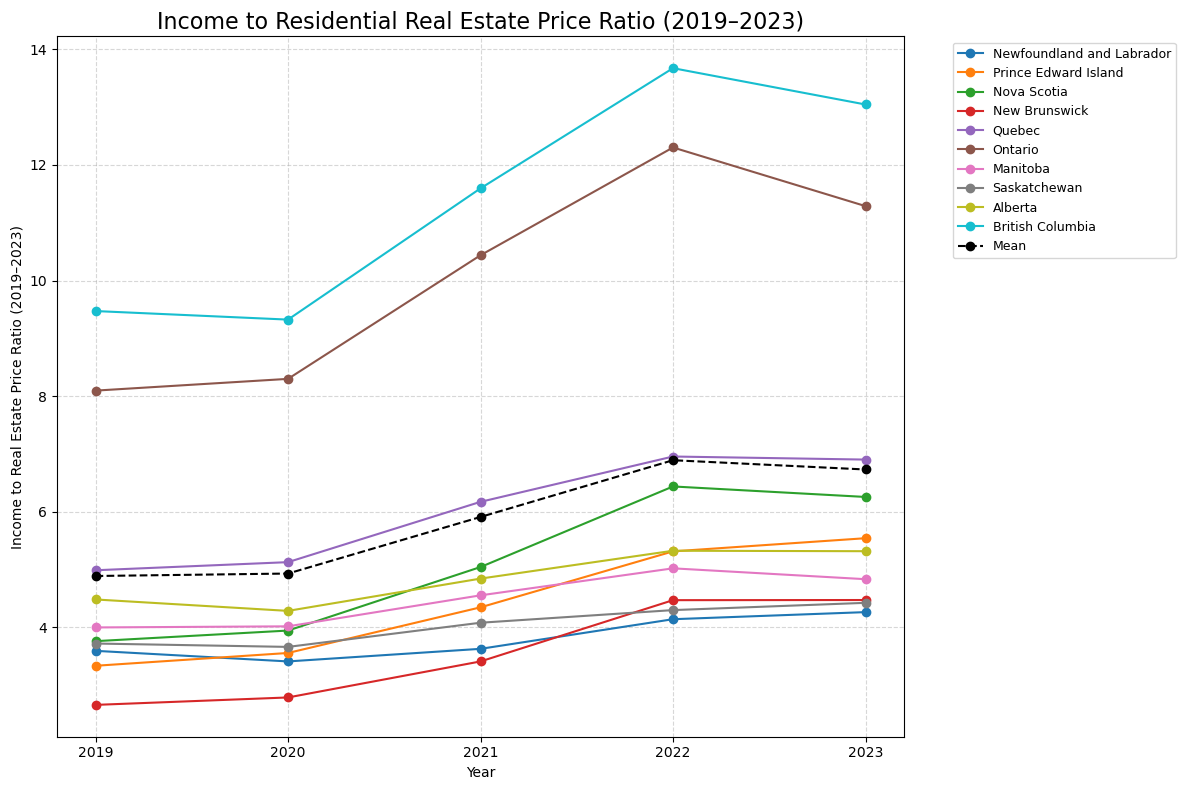

In [33]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define  x-axis labels
years = ['2019', '2020', '2021', '2022', '2023']
# Corresponding column names in ratio_df
columns = [f'{year}_affordability_ratio' for year in years]

# Plot each province except Mean
for i, row in ratio_df.iterrows():
    province = row['Province']
    plt.plot(years,
             [row[col] for col in columns],
             marker='o',
             label=province,
             color=color_map[province],
             linestyle='--' if province == 'Mean' else '-')

# Formatting
plt.title('Income to Residential Real Estate Price Ratio (2019–2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Income to Real Estate Price Ratio (2019–2023)')
plt.xticks(years)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

4.4 Heat map of housing affordability ratio by year/province

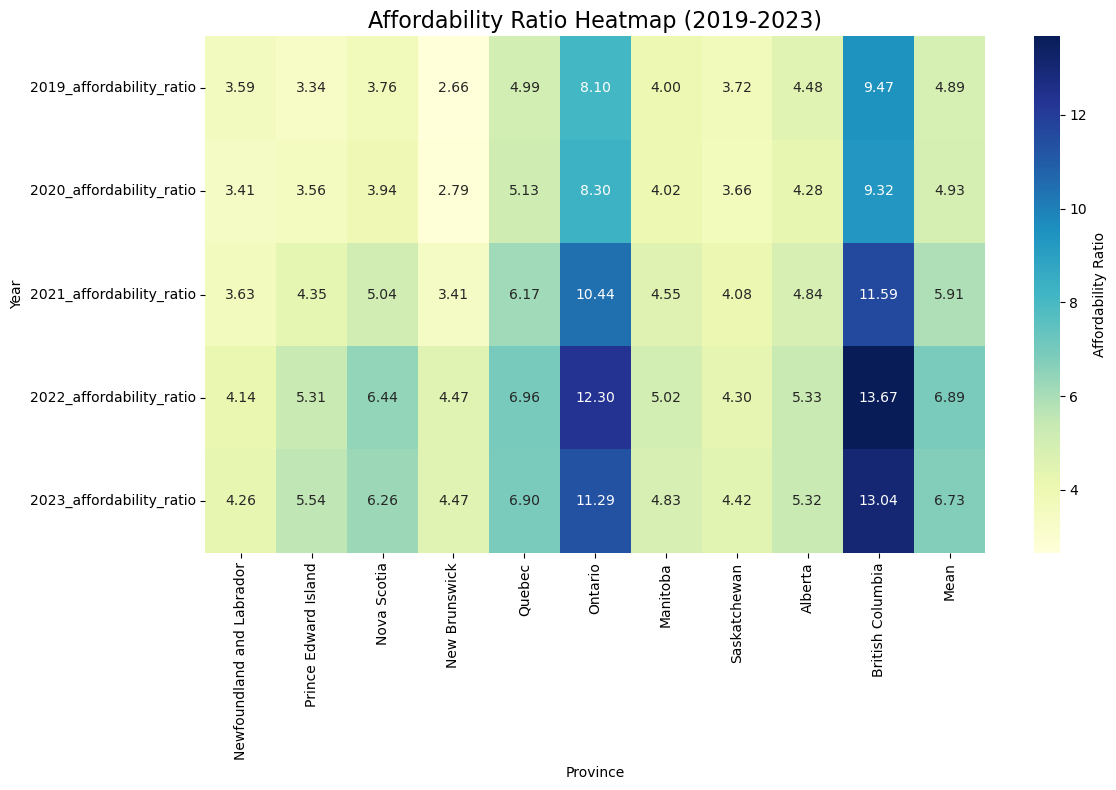

In [34]:
# Use a heatmap for affordability ratio visualization 
plt.figure(figsize=(12, 8))
affordability_matrix = ratio_df.set_index('Province').T
sns.heatmap(affordability_matrix, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Affordability Ratio'})
plt.title('Affordability Ratio Heatmap (2019-2023)', fontsize=16)
plt.xlabel('Province')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

## Part 5: Clustering Analysis (K-Means)

5.1 Prepare data and select features

In [35]:
# Remove the mean row
ratio_cluster_df = ratio_df[ratio_df["Province"] != "Mean"].copy()

# Extract just the affordability ratio columns
years = ['2019_affordability_ratio', '2020_affordability_ratio', '2021_affordability_ratio',
         '2022_affordability_ratio', '2023_affordability_ratio']

X = ratio_cluster_df[years]

5.2 Standardize features

In [36]:
# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

5.4 Apply K-Means clustering

In [37]:
# Use elbow method to determine number of clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

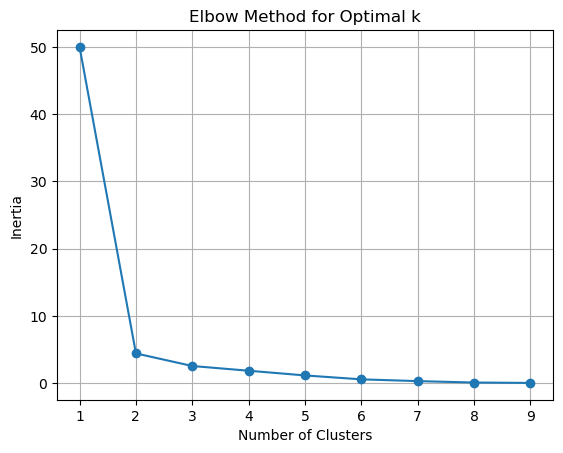

In [38]:
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

The dramatic drop in inertia from cluster 1 to cluster 2 (50 to approximately 5) suggests that most of the variance is explained by just 2 clusters. After that, the reduction in inertia, aka improvement, slows down drastically, which is a classic elbow shape at k=2. 

k = 2 reveals that there are two dominant affordability patterns across provinces. We will run the K-means clustering with 2 clusters.

In [39]:
# Fit KMeans with n_clusters=2
kmeans = KMeans(n_clusters=2, random_state=42)
ratio_cluster_df['Cluster'] = kmeans.fit_predict(X_scaled)

# See which provinces fall into which clusters
print(ratio_cluster_df[['Province', 'Cluster']])

                    Province  Cluster
0  Newfoundland and Labrador        0
1       Prince Edward Island        0
2                Nova Scotia        0
3              New Brunswick        0
4                     Quebec        0
5                    Ontario        1
6                   Manitoba        0
7               Saskatchewan        0
8                    Alberta        0
9           British Columbia        1


5.4 Visualize clusters

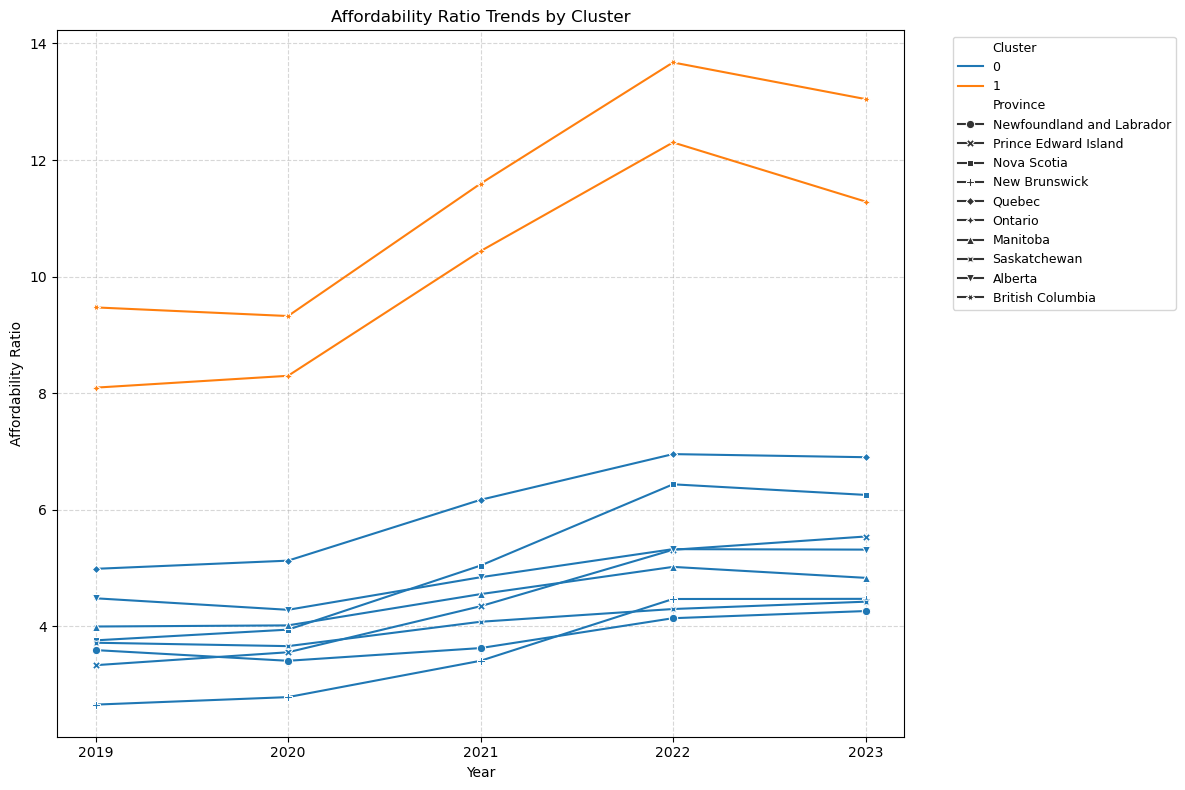

In [40]:
# Melt for easier plotting
melted = ratio_cluster_df.melt(id_vars=['Province', 'Cluster'],
                                value_vars=years,
                                var_name='Year',
                                value_name='Affordability Ratio')
melted['Year'] = melted['Year'].str.extract(r'(\d{4})') 

plt.figure(figsize=(12, 8))
sns.lineplot(data=melted, x='Year', y='Affordability Ratio',
             hue='Cluster', style='Province', markers=True, dashes=False)

plt.title('Affordability Ratio Trends by Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

5.5 Interpret cluster patterns 

Ontario and BC are alone in the second cluster, grouping them into the least affordable group based on the affordability ratio of median income to mean residential real estate prices.

# Part 6: Conclusion

6.1 Summary of findings

The analysis explored housing affordability across Canadian provinces from 2019 to 2023 using a combination of median after-tax income and average housing prices. I identified trends and regional disparities by calculating year-over-year percentage changes and creating an affordability ratio by dividing housing prices by income.

The findings from the k-means clustering confirm a nationwide decline in housing affordability, most severely in British Columbia and Ontario, where housing prices have far outpaced income growth. In British Columbia, for example, the average home price reached 13 times the median after-tax income by 2023, the highest ratio in the country. In contrast, Newfoundland and Labrador remained the most affordable, with a ratio closer to 4.  

Between 2019 and 2023, Ontario's housing prices rose by 46.9% (from 603,908.33 to 887,166.67) while the median after-tax income rose only 5.4%, from 74,600 to 78,600, clearly illustrating the rapid erosion of affordability.

#### How does this compare to historical affordability ratios?
The affordability ratio, also known as the median multiple, is mentioned in a 2023 Canadian Human Rights Commission document titled A HUMAN  RIGHTS-BASED CALCULATION OF CANADA’S HOUSING  SUPPLY SHORTAGES. The report mentions that a median multiple of 3.0 has long been seen as the affordability threshold (https://www.homelesshub.ca/sites/default/files/attachments/Whitzman-Human_Rights_Based_Supply_Report-EN_1.pdf#:~:text=first,2021%20dollars%2C%20indicative%20rents%20should). No Canadian province currently meets the standard for individual affordability. Whitzman's report highlights that Canada's median multiple has climbed from 2.5 in the early 1980s to 8.8, with figures reaching 13 in British Columbia and 11 in Ontario. She writes:

    "House prices would have to fall to a quarter of their current value across the country, a fifth of their current value in Toronto, and a sixth of their current value in Vancouver in order to once again become affordable to median-income first-time buyers, which is an unlikely prospect."

Overall, this project demonstrates how Canada's housing affordability rapidly declined during the COVID-19 pandemic, from 2019 to 2023. 